# Tutorial: Generating `NRSur7dq4` injections using `gwmat.injection` module

In [2]:
#!/home/anuj.mishra/anaconda3/envs/igwn-py39/bin/python3

import numpy as np
from time import time

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
mpl.rcParams['figure.figsize'] = (7.0, 5.0)
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = 18
mpl.rcParams['xtick.labelsize'] = 18.0
mpl.rcParams['ytick.labelsize'] = 18.0
mpl.rcParams['lines.markersize'] = 10.0
mpl.rcParams['axes.axisbelow'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Computer Modern'

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import gwmat

## Injecting a GW150914-like signal using `NRSur7dq4` in its corresponding PSD

#### Instruction to setup lal for using Surrogate/ROM models.

1. Clone this repository: git clone git@git.ligo.org:lscsoft/lalsuite-extra.git

2. Append to $LAL_DATA_PATH the path to directory containing data in `lalsuite_extra`. You can add this line to your `.bashrc`:

```
export LAL_DATA_PATH=/home/anuj.mishra/git_repos/lalsuite-extra/data/lalsimulation/:${LAL_DATA_PATH}

```

3. In a Jupyter Notebook, you will need to manually supply the path again, like this:

```
import os
os.environ['LAL_DATA_PATH'] = '/home/anuj.mishra/git_repos/lalsuite-extra/data/lalsimulation/:${LAL_DATA_PATH}'

```

P.S.: Make sure to change the paths accordingly based on your downloaded location.

In [3]:
import os
def set_lal_data_path(path):
    if os.path.isdir(path):
        os.environ['LAL_DATA_PATH'] = f"{path}:${{LAL_DATA_PATH}}"
        print(f"LAL_DATA_PATH set to {os.environ['LAL_DATA_PATH']}")
    else:
        print(f"Warning: The path {path} does not exist. Please check the path.")

set_lal_data_path("/home/anuj.mishra/git_repos/lalsuite-extra/data/lalsimulation/")

LAL_DATA_PATH set to /home/anuj.mishra/git_repos/lalsuite-extra/data/lalsimulation/:${LAL_DATA_PATH}


In [4]:
# maxL params obtained from `IGWN-GWTC2p1-v2-GW150914_095045_PEDataRelease_mixed_cosmo.h5` 
# using `C01:Mixed` sample key. 
# You may see the commented code below to find out how these parameters were obtained.
gw150914_params = {
    "mass_1" :  36.899196999999994,
    "mass_2" :  32.841122,
    "a_1" :  0.4589379196155383,
    "a_2" :  0.6217996075936105,
    "tilt_1" :  1.3119020553581624,
    "tilt_2" :  1.9677689908003024,
    "phi_jl" :  5.066189795720256,
    "phi_12" :  2.35369776837124,
    "ra" :  1.6894226000000003,
    "dec" :  -1.2408674,
    "psi" :  1.205441068972152,
    "phase" :  3.719825515003542,
    "luminosity_distance" :  402.60244,
    "theta_jn" :  2.74767078690558,
    "geocent_time":  1126259462.426434,
} # in J-frame.

Note that since `NRSur7dq4` is a time-domain model, we set `f_start`—the starting frequency of the 22 mode for a time-domain model—to a value lower than 20. Due to the limited number of cycles in `NRSur7dq4`, the waveform cannot begin at an arbitrarily low frequency. The lower limit on the starting frequency depends on the total binary mass: the heavier the binary, the lower the `f_start` can be. In this case, we set `f_start` = 15.

Saving H1 data: ./H-H1_PyCBC-Injection-1126259449-16.gwf
Saving L1 data: ./L-L1_PyCBC-Injection-1126259449-16.gwf

Output of `simulate_injection_with_comprehensive_output`:

Keys: dict_keys(['pure_polarized_wfs', 'pure_ifo_signal', 'noisy_ifo_signal', 'psd', 'signal_templates', 'matched_filter_snr', 'optimal_snr', 'network_optimal_snr', 'matched_filter_snr_timeseries', 'network_matched_filter_snr'])

Output:
pure_polarized_wfs : {'hp': <pycbc.types.timeseries.TimeSeries object at 0x7f48b13a36d0>, 'hc': <pycbc.types.timeseries.TimeSeries object at 0x7f48b0b3fa00>}
pure_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7f480470e280>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7f48b13a34c0>}
noisy_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7f4804359400>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7f48043593d0>}
psd : {'H1': <pycbc.types.frequencyseries.FrequencySeries object at 0x7f48b0b3f880>, 'L1': <pycbc.types.frequencyseries

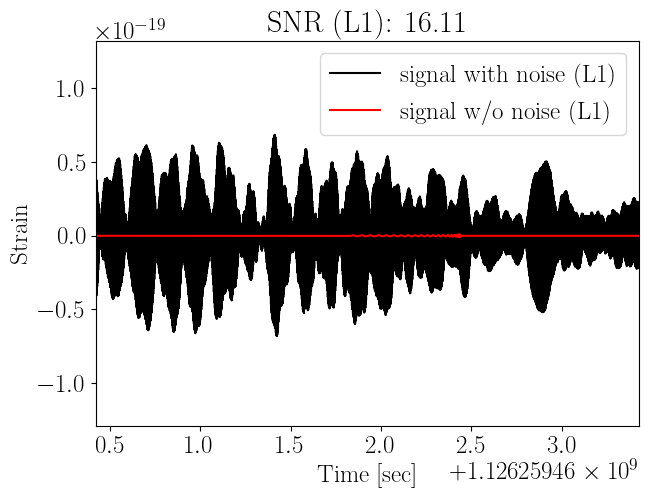

Network Optimal SNR: 28.29


In [5]:
init_params = dict(wf_domain="TD", f_start=20, snr_f_min=20., snr_f_max=None,
            f_ref=20., sample_rate=2048, delta_t=None, wf_approximant="NRSur7dq4",
            ifo_list = ['H1', 'L1']) 
cbc_params =  gw150914_params
misc_params = dict(rwrap = 0, cyclic_time_shift_method = "gwmat",
                   taper_hp_hc=True,  hp_hc_extra_padding_at_start=4,
                   make_hp_hc_duration_power_of_2=True,
                   extra_padding_at_start=1, extra_padding_at_end=2,
                   save_data=True, data_outdir = './',
                   data_label=None, data_channel='PyCBC-Injection')
psd_params = dict(Noise=True, psd_H1="gw150914_H1_psd.txt", psd_L1="gw150914_L1_psd.txt", 
                  noise_seed=127, is_asd_file=False, psd_f_low=None)

params = {**init_params, **cbc_params, **psd_params, **misc_params}


## WF generation
res = gwmat.injection.simulate_injection_with_comprehensive_output(**params)
print("\nOutput of `simulate_injection_with_comprehensive_output`:\n")
print("Keys:", res.keys())
print("\nOutput:")
gwmat.general_utils.print_dict(res)
print("\n")

# Plots
for ifo in params['ifo_list']:
    wf_with_noise = res['noisy_ifo_signal'][ifo]
    wf_without_noise = res['pure_ifo_signal'][ifo] 
    snr_ifo = res['optimal_snr'][ifo] 

    plt.plot(wf_with_noise.sample_times, wf_with_noise, color='black', linestyle='solid', label='signal with noise ('+ifo+')')
    plt.plot(wf_without_noise.sample_times, wf_without_noise, color='red', linestyle='solid', label='signal w/o noise ('+ifo+')')   
    plt.title('SNR ('+ifo+'): {:.2f}'.format(snr_ifo))
    plt.xlabel('Time [sec]')
    plt.ylabel('Strain')
    plt.legend()
    plt.xlim(params["geocent_time"]-2, params["geocent_time"]+1)
    plt.show()

net_SNR = res['network_optimal_snr'] 
print('Network Optimal SNR: {:.2f}'.format(net_SNR))